<div align='center'> <h1>Hypothesis Testing</h1></div>
<div align='center'> <h3>Problem Statement</h3></div>
Investigate the effect of independent variables (price per square foot, number of bathrooms, and floor size) on the price of a high-floor, spacious 2-bedroom house with a spectacular view, available at an affordable price. 
The null hypothesis (H0) states that there is no significant effect of the independent variables on the price. 
The alternative hypothesis (H1) suggests that there is a significant effect of the independent variables on the price. 
The objective is to test this hypothesis using the provided data in the "Data" Excel file.
 
Selection of Confidence Level: A 95% confidence level is chosen to determine the range within which the true parameter value is likely to fall. A 95% confidence interval covers 95% of the normal curve, meaning that there is a 5% probability of observing a value outside of this range.

 Statistical Test or Model: To test the hypothesis, a multiple regression analysis is conducted. This analysis helps determine the relationship between the dependent variable (price) and the independent variables (price per square foot, number of bathrooms, and floor size).

In [10]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for hypothesis testing
import scipy.stats as st

In [12]:
# Loading data

df=pd.read_excel('Dataset_1.xlsx')
df.head(2)

,DESCRIPTION,EXTRACT_DATE,DATA_SOURCE,PROPERTY_TYPE,LOCATION,REGION,PRICE,FLOOR_SIZE,NO_OF_BEDROOMS,NO_OF_BATHROOMS,PRICE_SQFT,Unnamed: 11
0,A Lovely Apartment Perfect As Your Next Home,20211028,Dubizzle,Rent,Yas Island,Abu Dhabi,85000,1068,2,2,79.588015,NaN
1,A Resort Style Lifestyle With Water Views,20211028,Dubizzle,Rent,Yas Island,Abu Dhabi,79960,1050,2,2,76.152381,NaN


In [14]:
df.shape

(358, 12)

# Exploratory Data Analysis`

In [17]:
# selecting only required column
data1=df.iloc[:,3:11]
data1.head()

,PROPERTY_TYPE,LOCATION,REGION,PRICE,FLOOR_SIZE,NO_OF_BEDROOMS,NO_OF_BATHROOMS,PRICE_SQFT
0,Rent,Yas Island,Abu Dhabi,85000,1068,2,2,79.588015
1,Rent,Yas Island,Abu Dhabi,79960,1050,2,2,76.152381
2,Rent,Yas Island,Abu Dhabi,85000,1044,2,2,81.417625
3,Rent,Yas Island,Abu Dhabi,115000,1472,2,3,78.125000
4,Rent,Yas Island,Abu Dhabi,84995,1674,2,3,50.773596


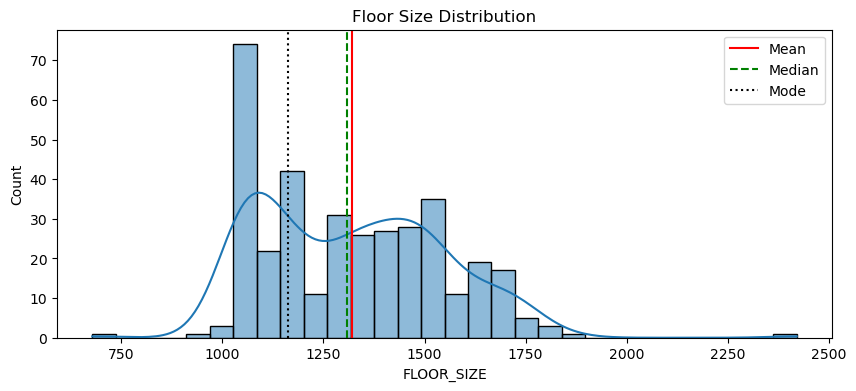

In [19]:
# Floor size distribution along wtih mean median mode values
plt.figure(figsize=(10,4))
sns.histplot(data1['FLOOR_SIZE'],bins=30,kde=True)
plt.axvline(data1['FLOOR_SIZE'].mean(),color='red',label='Mean')
plt.axvline(data1['FLOOR_SIZE'].median(),color='green',linestyle='--',label='Median')
plt.axvline(data1['FLOOR_SIZE'].mode()[0],color='black',linestyle=':',label='Mode')
plt.title('Floor Size Distribution')

plt.legend()
plt.show()

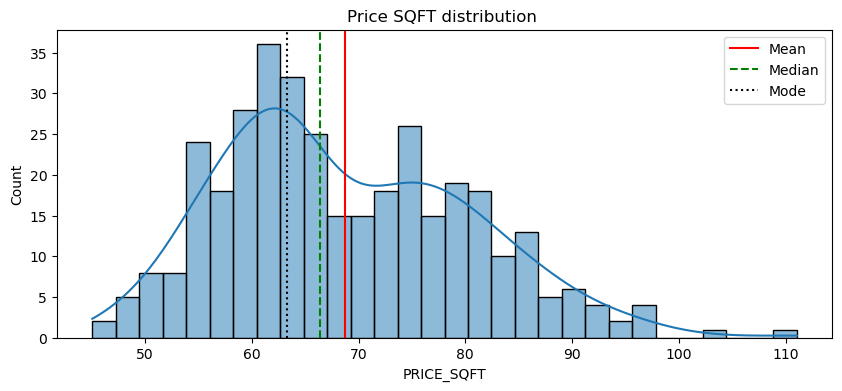

In [21]:
# Price SQFT distribution graph
plt.figure(figsize=(10,4))
sns.histplot(data1['PRICE_SQFT'],bins=30,kde=True)

# mean mode median lines
plt.axvline(data1['PRICE_SQFT'].mean(),color='red',label='Mean')
plt.axvline(data1['PRICE_SQFT'].median(),color='green',linestyle='--',label='Median')
plt.axvline(data1['PRICE_SQFT'].mode()[0],color='black',linestyle=':',label='Mode')

plt.title('Price SQFT distribution ')
plt.legend()
plt.show()

In [23]:
# printing uniques values for columns
columns = ['PROPERTY_TYPE','LOCATION','REGION','NO_OF_BEDROOMS','NO_OF_BATHROOMS']
for col in columns:
    print(data1[col].unique())
    # print("*******\n")

['Rent']
['Yas Island' 'Al Reem Island']
['Abu Dhabi']
[2]
[2 3 1 4 5]


In [25]:
data1['NO_OF_BATHROOMS'].value_counts()

NO_OF_BATHROOMS
3    229
2     98
4     29
1      1
5      1
Name: count, dtype: int64

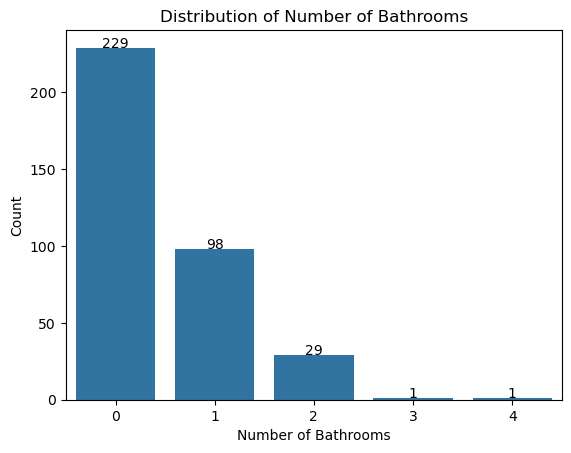

In [37]:
# graph for no of bathrooms distribution

sns.barplot(data1['NO_OF_BATHROOMS'].value_counts().values)
# add data labels on columns
for index, value in enumerate(data1['NO_OF_BATHROOMS'].value_counts().values):
    plt.text(index,value,str(value),ha='center')
# adding details to graph
plt.title("Distribution of Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

plt.show()

## Hypothesis Testing

#### H0 : There is no significant effect of independent variable on the price 
#### H1 : There is significant effect of independent variable on the price


In [44]:
CI=0.95
alpha=1-CI
n=len(data1)
dof=n-1


In [48]:
# applying t-test on data (Price SQFT column) to get pvalue

statistics_value,pvalue=st.ttest_ind(data1['PRICE'],data1['PRICE_SQFT'])
print('statistics value is :',statistics_value)
print('pvalue is :',pvalue)


if pvalue<0.05:
    print('WE REJECT THE NULL HYPOTHESIS')
else:
    print('WE FAILED TO REJECT THE NULL HYPOTESIS')

statistics value is : 90.59669004479468
pvalue is : 0.0
WE REJECT THE NULL HYPOTHESIS


In [50]:
# applying t-test on data (No of bathrooms column) to get pvalue

statistics_value,pvalue=st.ttest_ind(data1['PRICE'],data1['NO_OF_BATHROOMS'])
print('statistics value is :',statistics_value)
print('pvalue is :',pvalue)

if pvalue<0.05:
    print('WE REJECT THE NULL HYPOTHESIS')
else:
    print('WE FAILED TO REJECT THE NULL HYPOTESIS')

statistics value is : 90.66313440634977
pvalue is : 0.0
WE REJECT THE NULL HYPOTHESIS


In [54]:
# applying t-test on data (Floor size column) to get pvalue

statistics_value,pvalue=st.ttest_ind(data1['PRICE'],data1['FLOOR_SIZE'])
print('statistics value is :',statistics_value)
print('pvalue is :',pvalue)

if pvalue<0.05:
    print('WE REJECT THE NULL HYPOTHESIS')
else:
    print('WE FAILED TO REJECT THE NULL HYPOTESIS')

statistics value is : 89.3292263783175
pvalue is : 0.0
WE REJECT THE NULL HYPOTHESIS


In [56]:
# applying Chi test on data (location , price column) to get pvalue

CHI_VALUE,pvalue,dof,arr=st.chi2_contingency(df['PRICE'],df['LOCATION'])
print(CHI_VALUE)
print(pvalue)

if pvalue<0.05:
    print('WE REJECT THE NULL HYPOTHESIS')
else:
    print('WE FAILED TO REJECT THE NULL HYPOTESIS')

0.0
1.0
WE FAILED TO REJECT THE NULL HYPOTESIS


**We Reject the Null Hypothesis for FLOOR SIZE , PRICE SQFT , NO OF BATHROOMS -> There is no significant effect of independent variable on the price**

**Meanwhile for LOCATION we failed to reject the Null Hypothesis -> There is no significant effect of independent variable on the price**